<a href="https://colab.research.google.com/github/Mabzak-Knight/penerjemah_manga/blob/main/colab/Penerjemah_halaman_manga_(alfa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/kha-white/comic-text-detector/

Cloning into 'comic-text-detector'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 329 (delta 60), reused 56 (delta 56), pack-reused 254
Receiving objects: 100% (329/329), 10.04 MiB | 28.79 MiB/s, done.
Resolving deltas: 100% (209/209), done.


In [ ]:
cd /content

/content


In [ ]:
!git clone https://github.com/Mabzak-Knight/penerjemah_manga.git

Cloning into 'penerjemah_manga'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 100 (delta 30), reused 15 (delta 4), pack-reused 41
Receiving objects: 100% (100/100), 77.75 MiB | 26.43 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [1]:
pip install pyclipper

In [1]:
import cv2
from penerjemah_manga.assets.ctd import model2annotations
from google.colab.patches import cv2_imshow

In [2]:
model_path = r'/content/penerjemah_manga/assets/comictextdetector.pt'
img_dir = r'/content/penerjemah_manga/example'                              # can be dir list
save_dir = r'/content/hasil'

In [3]:
kordinat=model2annotations(model_path, img_dir, save_dir, save_json=False)

100%|██████████| 1/1 [00:07<00:00,  7.11s/it]


In [4]:
kordinat

['1 0.7367713004484304 0.13125 0.12107623318385652 0.09375\n1 0.22152466367713006 0.039999999999999994 0.39282511210762333 0.042499999999999996\n1 0.8887892376681614 0.531875 0.05022421524663678 0.03499999999999992\n1 0.8313901345291479 0.5974999999999999 0.05560538116591929 0.09750000000000003\n1 0.04349775784753364 0.648125 0.06008968609865471 0.33125\n1 0.8408071748878924 0.9434374999999999 0.06547085201793723 0.024374999999999925\n1 0.6466367713004484 0.7928124999999999 0.06816143497757843 0.08062500000000006\n1 0.526457399103139 0.9671875000000001 0.4143497757847534 0.020625000000000004']

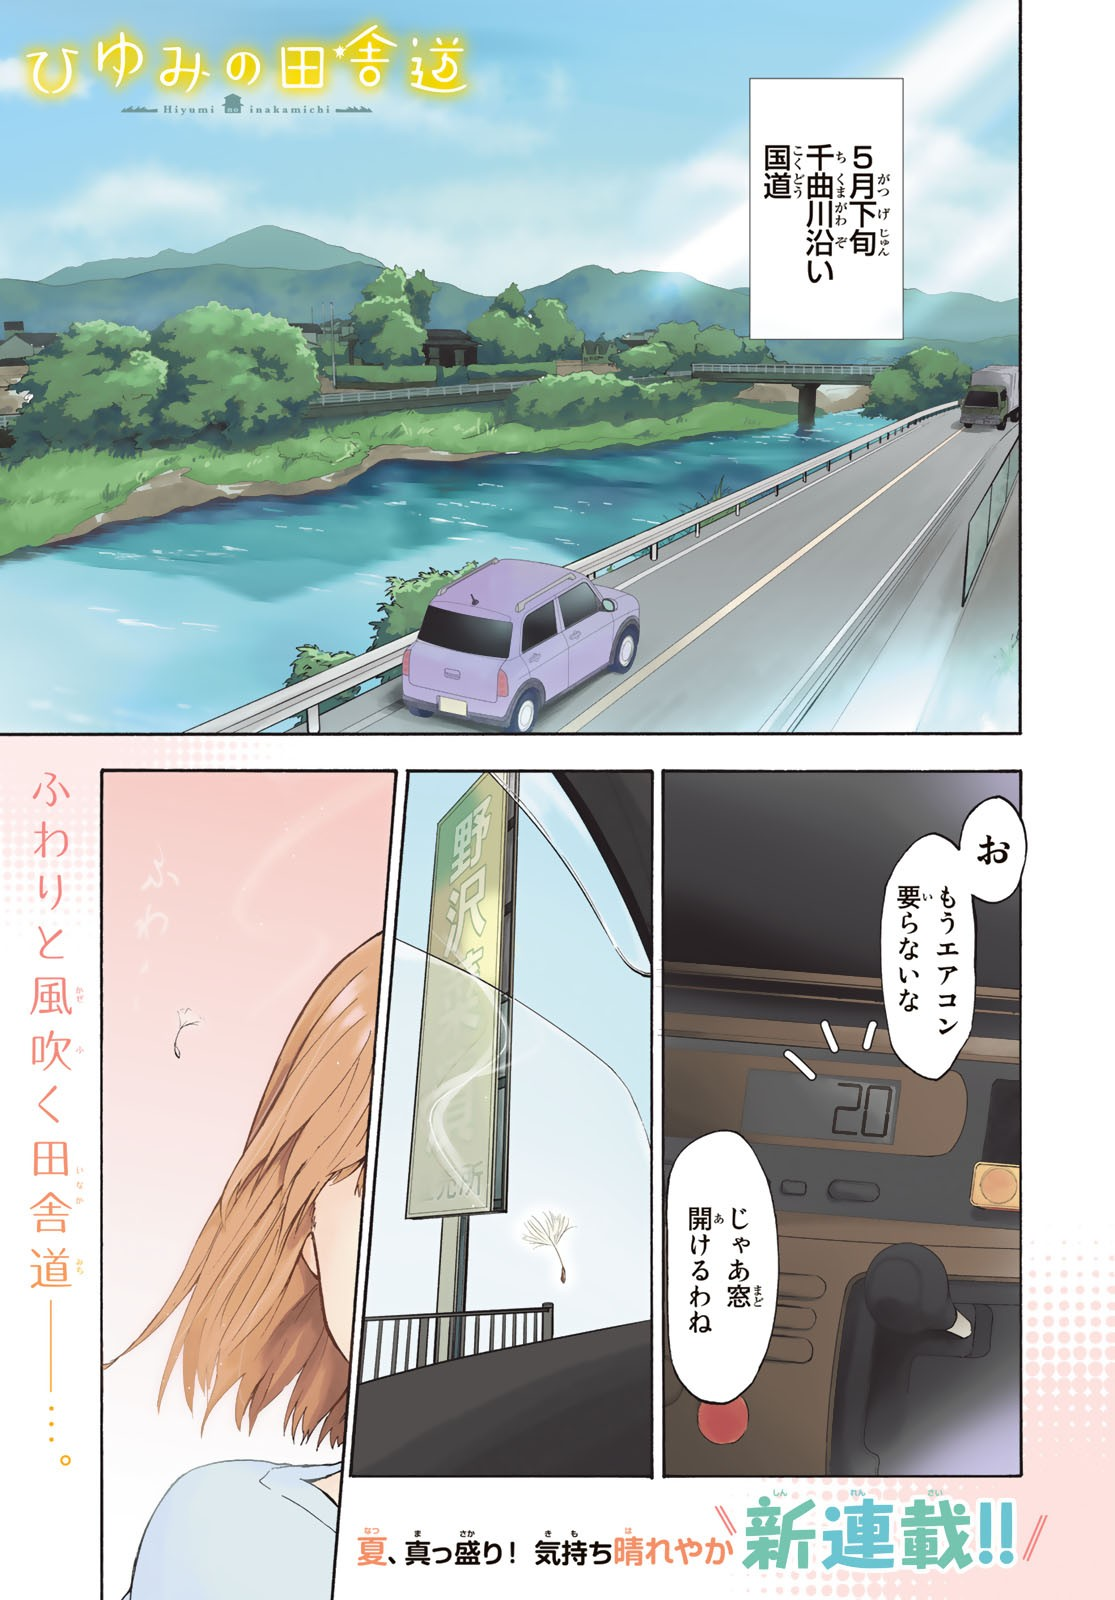

In [5]:
# Baca gambar
lokasi_image = '/content/hasil/001.png'
image_awal = cv2.imread(lokasi_image)
cv2_imshow(image_awal)

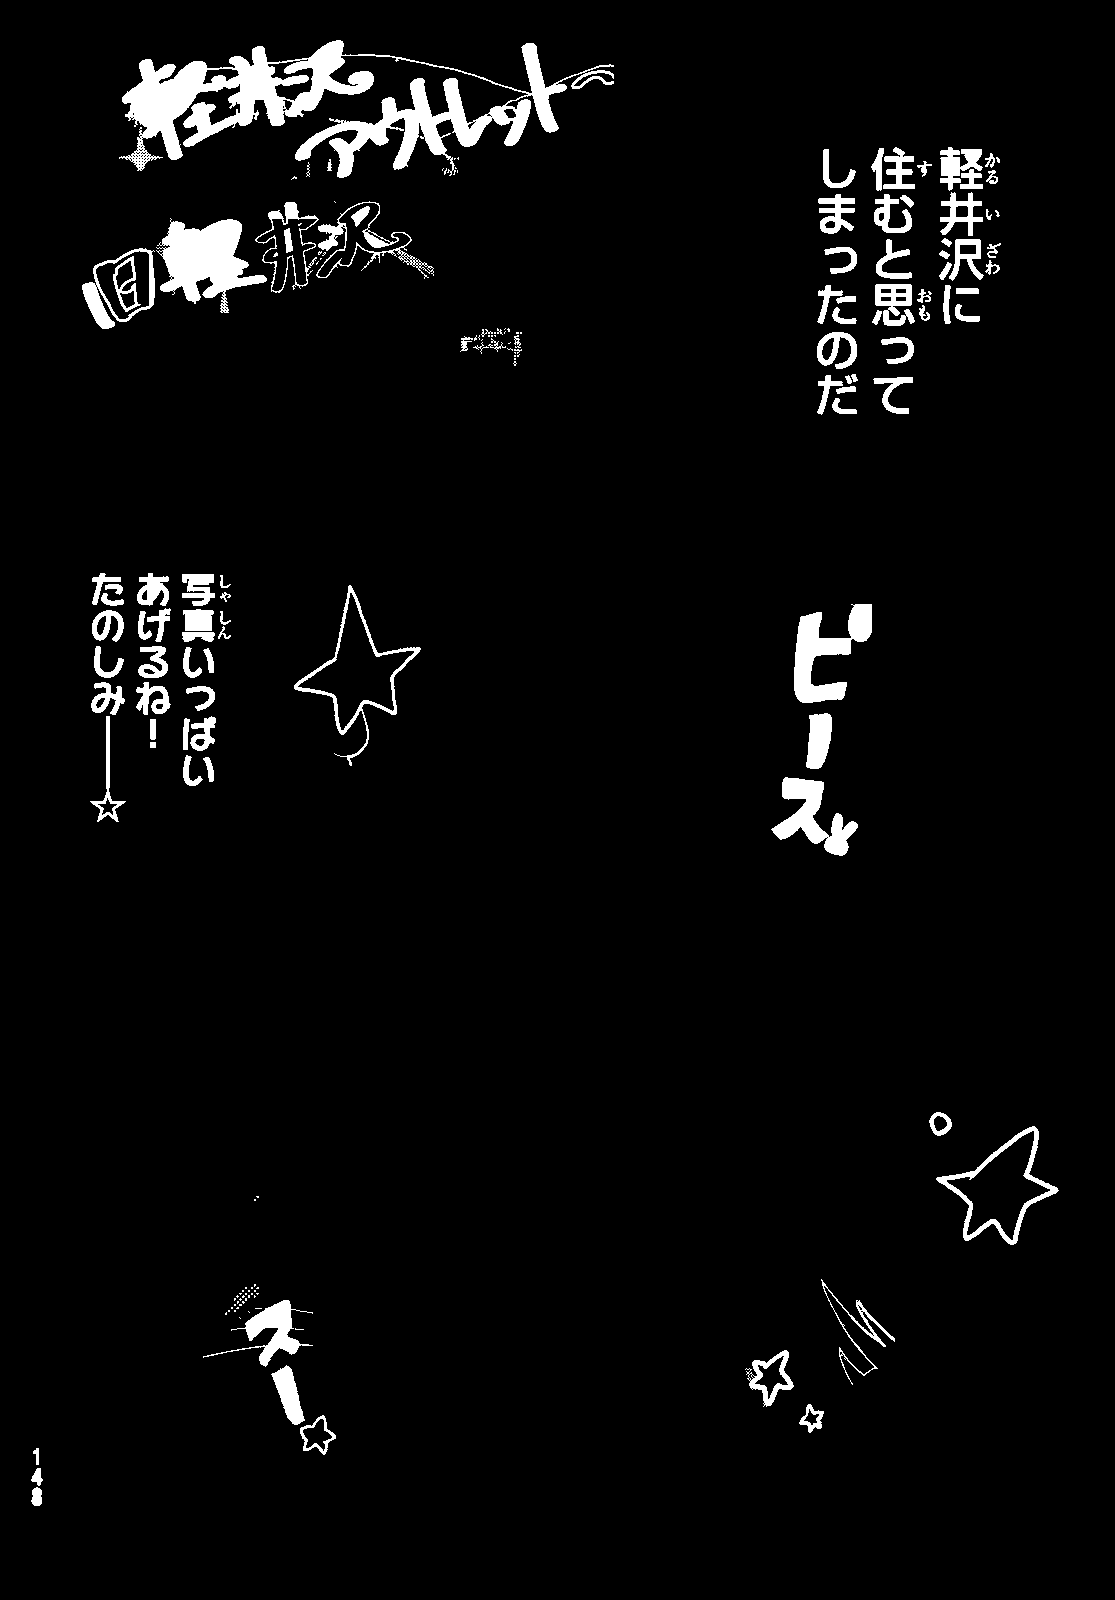

In [ ]:
# Baca gambar
image_black = cv2.imread('/content/data/hasil/mask-004.png')
cv2_imshow(image_black)

In [ ]:
# Baca file teks dengan koordinat
with open('/content/hasil/001.txt', 'r') as file:
    coordinates = file.read()

-------------------------------

In [6]:
lines = kordinat[0].split('\n')

In [7]:
lines

['1 0.7367713004484304 0.13125 0.12107623318385652 0.09375',
 '1 0.22152466367713006 0.039999999999999994 0.39282511210762333 0.042499999999999996',
 '1 0.8887892376681614 0.531875 0.05022421524663678 0.03499999999999992',
 '1 0.8313901345291479 0.5974999999999999 0.05560538116591929 0.09750000000000003',
 '1 0.04349775784753364 0.648125 0.06008968609865471 0.33125',
 '1 0.8408071748878924 0.9434374999999999 0.06547085201793723 0.024374999999999925',
 '1 0.6466367713004484 0.7928124999999999 0.06816143497757843 0.08062500000000006',
 '1 0.526457399103139 0.9671875000000001 0.4143497757847534 0.020625000000000004']

In [17]:
# kordinat = model2annotations(model_path, img_dir, save_dir, save_json=False)  # Memanggil fungsi untuk mendapatkan kordinat

image_kotakin = cv2.imread(lokasi_image)
cropped_images = []  # Membuat list untuk menyimpan potongan gambar

# Loop melalui setiap koordinat bounding box
for line in lines:
    values = line.split(' ')
    x, y, width, height = map(float, values[1:])  # Dimula

    # Konversi nilai ke piksel
    width_pixel = int(width * (image_kotakin.shape[1])) + 20
    height_pixel = int(height * image_kotakin.shape[0]) + 10
    x_pixel = int(x * (image_kotakin.shape[1])) - int((width_pixel - 20) / 2) - 5
    y_pixel = int(y * image_kotakin.shape[0]) - int((height_pixel - 10) / 2) - 5

    # Gambar kotak pembatas
    cv2.rectangle(image_kotakin, (x_pixel, y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (0, 255, 0), 2)

    cropped_image = image_kotakin[y_pixel:y_pixel + height_pixel, x_pixel:x_pixel + width_pixel]
    cropped_images.append(cropped_image)

# ...



  # Menyimpan gambar dengan kotak pembatas
  # cv2.imwrite('/content/manga-image-translator/result/final_with_bbox.png', image)

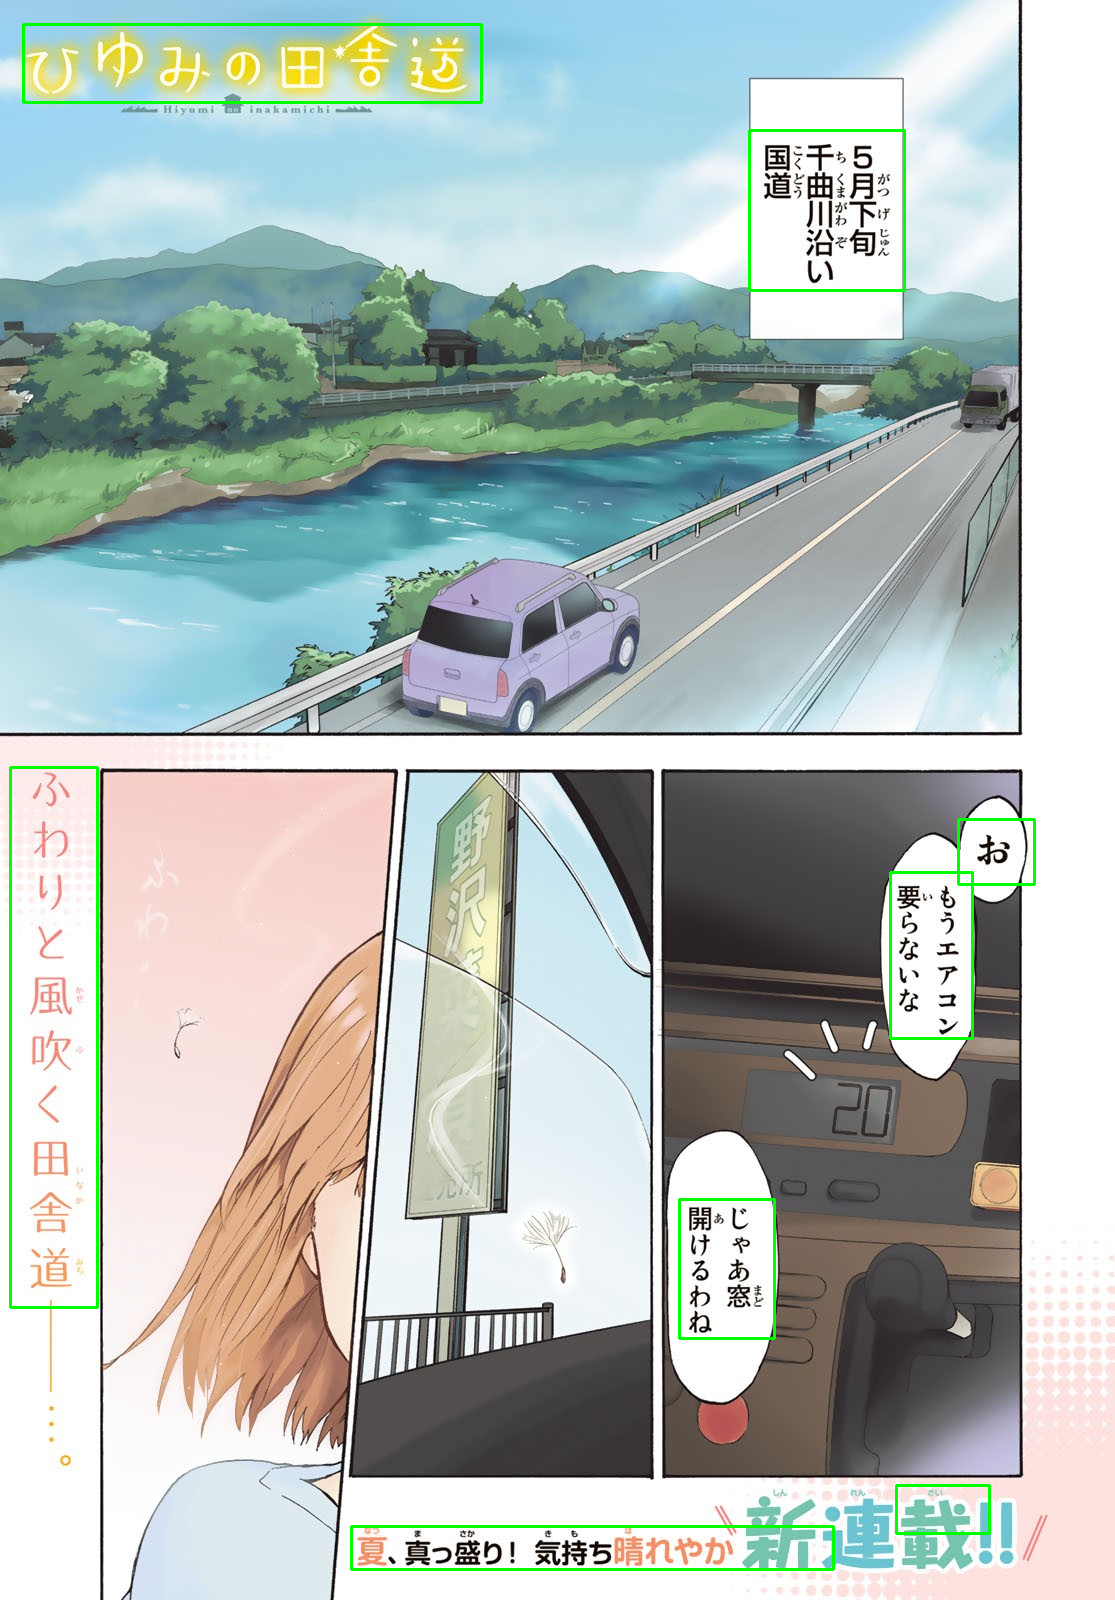

In [18]:
# Tampilkan gambar
cv2_imshow(image_kotakin)

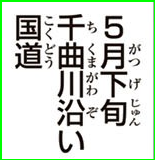

Potongan Gambar ke-1


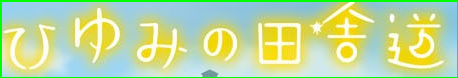

Potongan Gambar ke-2


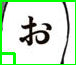

Potongan Gambar ke-3


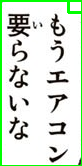

Potongan Gambar ke-4


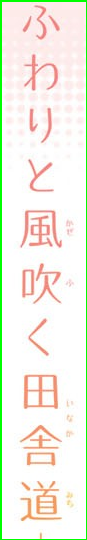

Potongan Gambar ke-5


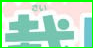

Potongan Gambar ke-6


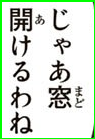

Potongan Gambar ke-7


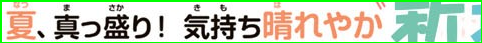

Potongan Gambar ke-8


In [19]:
for i, cropped_image in enumerate(cropped_images):
    cv2_imshow(cropped_image)
    print(f"Potongan Gambar ke-{i+1}")

-------------------------------

In [ ]:
image_polos = cv2.imread(lokasi_image)
# Loop melalui setiap koordinat bounding box
for line in coordinates.split('\n'):
    if line.strip():  # Memastikan baris tidak kosong
        _, x, y, width, height = map(float, line.split())
        # Konversi koordinat dan ukuran ke piksel
        width_pixel = int(width * (image_polos.shape[1])) +5
        height_pixel = int(height * image_polos.shape[0])
        x_pixel = int(x * (image_polos.shape[1])) - int(width_pixel/2)
        y_pixel = int(y * image_polos.shape[0]) - int(height_pixel/2)

        # Menggambar kotak putih di dalam kotak pembatas
        cv2.rectangle(image_polos, (x_pixel , y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (255, 255, 255), -1)


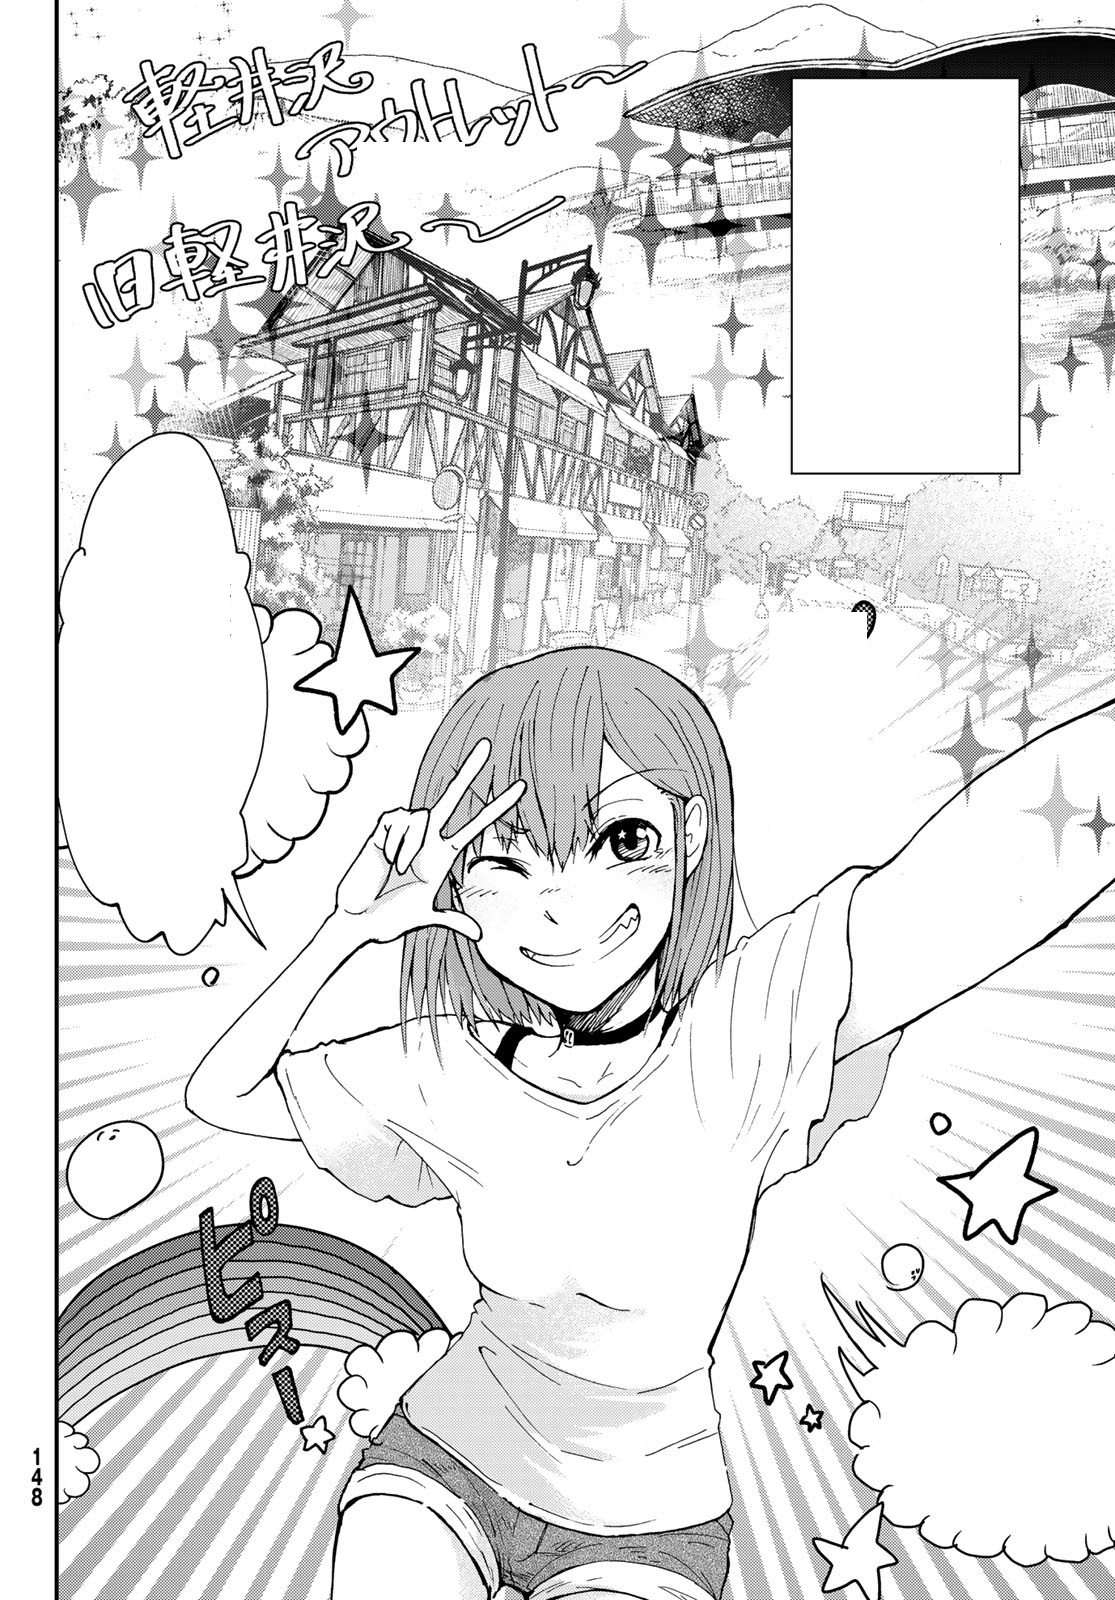

In [ ]:
# Tampilkan gambar
cv2_imshow(image_polos)

----------------

In [ ]:
image=cv2.imread(lokasi_image)

In [ ]:
# Fungsi untuk menambahkan teks dengan memecah baris jika terlalu panjang
def add_text_multiline(image, text, x, y, max_width, max_height):
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    font_color = (0, 0, 0)  # Warna teks (hitam)

     # Fungsi untuk menentukan ukuran font yang sesuai
    def get_font_scale(text, max_width, font=cv2.FONT_HERSHEY_SIMPLEX, font_thickness=1):
        font_scale = 1
        while True:
            (text_w, text_h), _ = cv2.getTextSize(text, font, font_scale, font_thickness)
            if text_w <= max_width:
                break
            font_scale -= 0.1
        return font_scale


    # Membagi teks menjadi baris-baris yang sesuai dengan lebar maksimum
    words = text.split()
    lines = ['']
    current_line = 0
    for word in words:
        test_line = lines[current_line] + ' ' + word if lines[current_line] else word
        (text_w, text_h), _ = cv2.getTextSize(test_line, font, font_scale, font_thickness)
        if text_w <= max_width:
            lines[current_line] = test_line
        else:
            current_line += 1
            lines.append(word)

    # Hitung tinggi total teks
    total_text_height = len(lines) * (text_h + 4)  # Spasi antar baris: 2 piksel

    # Tentukan posisi vertikal tengah
    y_centered = y + int((max_height - total_text_height) / 2)

    # Menambahkan teks ke gambar
    for i, line in enumerate(lines):
        text_size = cv2.getTextSize(line, font, font_scale, font_thickness)[0]
        text_x = int(x + (max_width - text_size[0]) / 2)
        text_y = y_centered + i * (text_h + 4)  # Spasi antar baris: 2 piksel

        cv2.putText(image, line, (text_x, text_y), font, font_scale, font_color, font_thickness, lineType=cv2.LINE_AA)

# ...

# Di dalam loop:
for idx, line in enumerate(coordinates.split('\n')):
    if line.strip():  # Memastikan baris tidak kosong
        _, x, y, width, height = map(float, line.split())
        # Konversi koordinat dan ukuran ke piksel
        width_pixel = int(width * (image.shape[1])) +5
        height_pixel = int(height * image.shape[0]) + 10
        x_pixel = int(x * (image.shape[1])) - int(width_pixel/2)
        y_pixel = int(y * image.shape[0]) - int(height_pixel/2)

        # Menggambar kotak putih di dalam kotak pembatas
        cv2.rectangle(image, (x_pixel , y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (255, 255, 255), -1)

        # Menambahkan teks ke dalam kotak putih
        text = f"Ini box {idx + 1}"
        add_text_multiline(image, text, x_pixel, y_pixel, width_pixel, height_pixel)


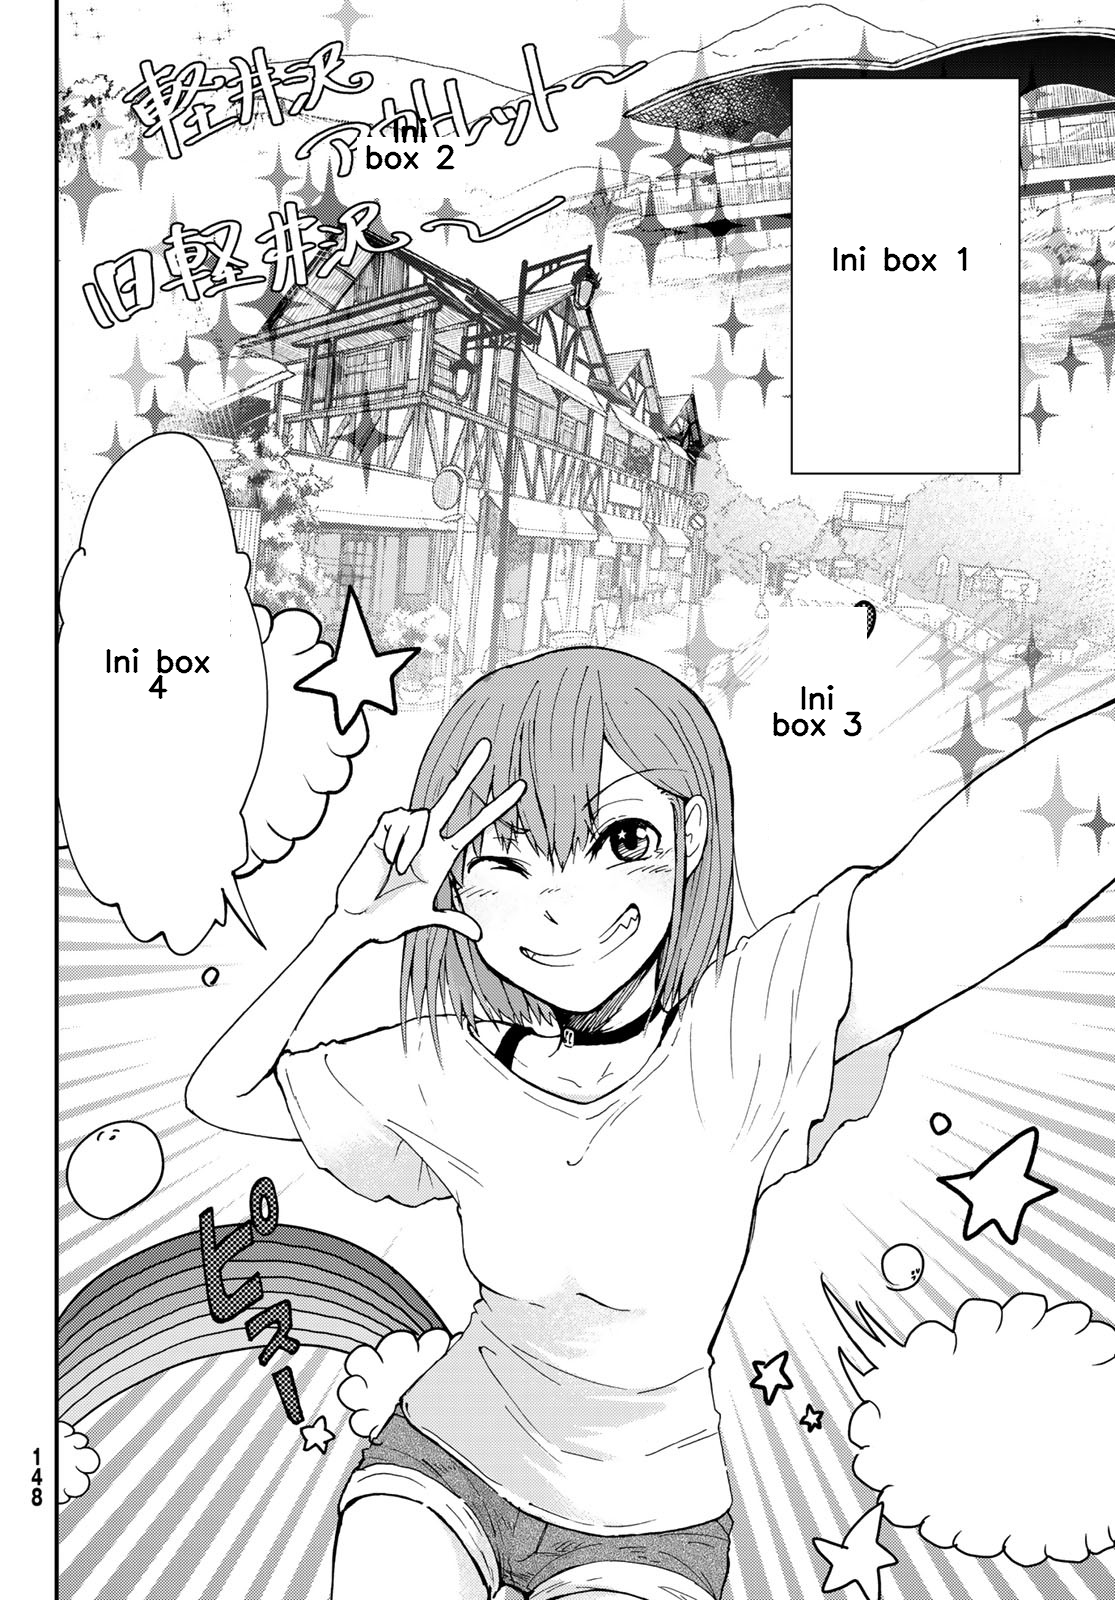

In [ ]:
# Tampilkan gambar
cv2_imshow(image)